In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
apm = pd.read_csv('/content/drive/MyDrive/Ojcommerce/AdPerformanceMetrics.csv')

In [66]:
apm.head(10)

,Item ID,Campaign ID,Click type,Month,Currency code,Impr.,Clicks,All conv.,Conv. value,Cost
0,2049732,12873554814,"Shopping , Product , Online",21-Aug,USD,229,1,1,0,1.22
1,1147211,12873554814,"Shopping , Product , Coupon",21-Aug,USD,723,1,0,0,0.66
2,1304415,12873554814,"Shopping , Product , Online",21-Aug,USD,16,1,1,0,0.27
3,640429,14236905013,"Shopping , Product , Online",21-Aug,USD,131,2,2,0,0.73
4,1776957,14484113718,"Shopping , Product , Online",21-Sep,USD,357,5,0,0,2.17
5,981178,12873554814,"Shopping , Product , Online",21-Aug,USD,523,1,1,0,0.41
6,1982012,12873554814,"Shopping , Product , Online",21-Aug,USD,"1,312",11,5,42.56,2.48
7,1624523,14397926158,"Shopping , Product , Online",21-Aug,USD,68,1,1,0,0.67
8,1319789,12873554814,"Shopping , Product , Online",21-Aug,USD,145,3,3,0,3.65
9,1336633,14236905013,"Shopping , Product , Online",21-Aug,USD,648,6,6,0,1.58


In [67]:
apm.describe()

,Item ID,Campaign ID,Cost
count,4.539400e+04,4.539400e+04,45394.000000
mean,1.362500e+06,1.390864e+10,5.454780
std,5.563046e+05,8.514170e+08,63.383726
min,5.222500e+04,1.729824e+09,0.010000
25%,9.677230e+05,1.287355e+10,0.390000
50%,1.365951e+06,1.439793e+10,0.920000
75%,1.943408e+06,1.448411e+10,2.360000
max,2.177213e+06,1.481253e+10,7206.340000


In [10]:
apm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45394 entries, 0 to 45393
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Item ID        45394 non-null  int64  
 1   Campaign ID    45394 non-null  int64  
 2   Click type     45394 non-null  object 
 3   Month          45394 non-null  object 
 4   Currency code  45394 non-null  object 
 5   Impr.          45394 non-null  object 
 6   Clicks         45394 non-null  object 
 7   All conv.      45394 non-null  object 
 8   Conv. value    45394 non-null  object 
 9   Cost           45394 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 3.5+ MB


In [11]:
apm.isnull().sum()

Item ID          0
Campaign ID      0
Click type       0
Month            0
Currency code    0
Impr.            0
Clicks           0
All conv.        0
Conv. value      0
Cost             0
dtype: int64

In [12]:
apm['Conv. value'] = apm['Conv. value'].str.replace(',', '')

In [13]:
apm['Conv. value'] = apm['Conv. value'].astype(float)

In [14]:
apm['ROAS'] = apm['Conv. value']/apm['Cost']

In [15]:
total_cost = apm['Cost'].sum()
total_return = apm['ROAS'].sum()
overall_roi = (total_return / total_cost) * 100
print("Total cost: $", total_cost)
print("Total return: $", total_return.sum())
print("Overall ROI: ", overall_roi)


Total cost: $ 247614.27
Total return: $ 331020.7024397148
Overall ROI:  133.68401685400232


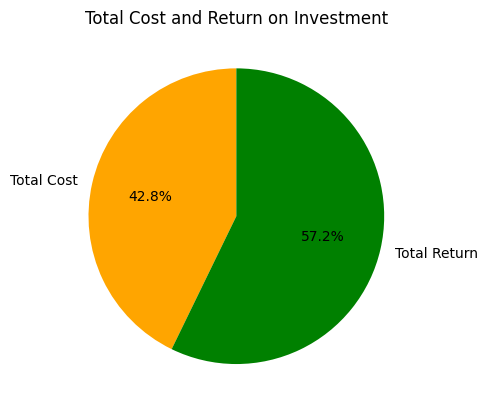

In [21]:
data = [total_cost, total_return.sum()]
labels = ['Total Cost', 'Total Return']
colors = ['orange', 'green']
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Total Cost and Return on Investment')
plt.show()

In [23]:
prd = pd.read_csv('/content/drive/MyDrive/Ojcommerce/ProductDetails.csv')

In [24]:
prd.head()

,Item ID,Product Title,Product type (1st level),Product type (2nd level),Product type (4th level),Product type (3rd level),Product type (5th level)
0,968100,Sunflower Water Fountain - Jeco - FCL145,home,home & garden,fountains,patio & outdoor decor,outdoor fountains
1,2165066,Laviva Estella 32 - Espresso Cabinet + White C...,home >,--,--,--,--
2,2157764,Lane Home Furnishings Manhattan Brown Queen Be...,home >,--,--,--,--
3,1448548,New Cat Condos Large Cat Play Gym - New Cat Co...,home,cat furniture & scratchers,--,--,--
4,638145,Rockland Melbourne Expandable Abs Carry On Col...,home,fashion & beauty,luggage,luggage & travel gear,carry-ons


In [25]:
prd.isnull().sum()

Item ID                     0
Product Title               0
Product type (1st level)    0
Product type (2nd level)    0
Product type (4th level)    0
Product type (3rd level)    0
Product type (5th level)    0
dtype: int64

In [26]:
prd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29016 entries, 0 to 29015
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Item ID                   29016 non-null  int64 
 1   Product Title             29016 non-null  object
 2   Product type (1st level)  29016 non-null  object
 3   Product type (2nd level)  29016 non-null  object
 4   Product type (4th level)  29016 non-null  object
 5   Product type (3rd level)  29016 non-null  object
 6   Product type (5th level)  29016 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.5+ MB


In [27]:
unique_products = prd.groupby(['Product type (1st level)', 'Product type (2nd level)', 'Product type (4th level)','Product type (5th level)'])['Product Title'].nunique()

In [28]:
print(unique_products)

Product type (1st level)  Product type (2nd level)          Product type (4th level)  Product type (5th level)
home                      agricultural fencing               --                        --                            1
                          all childrens halloween costumes   --                        --                            1
                          all home speakers                  --                        --                            4
                          all home stereos                   --                        --                            2
                          arts & crafts                      --                        --                           43
                                                                                                                  ... 
                          wheelchairs                        --                        --                            1
                          wine glasses                  

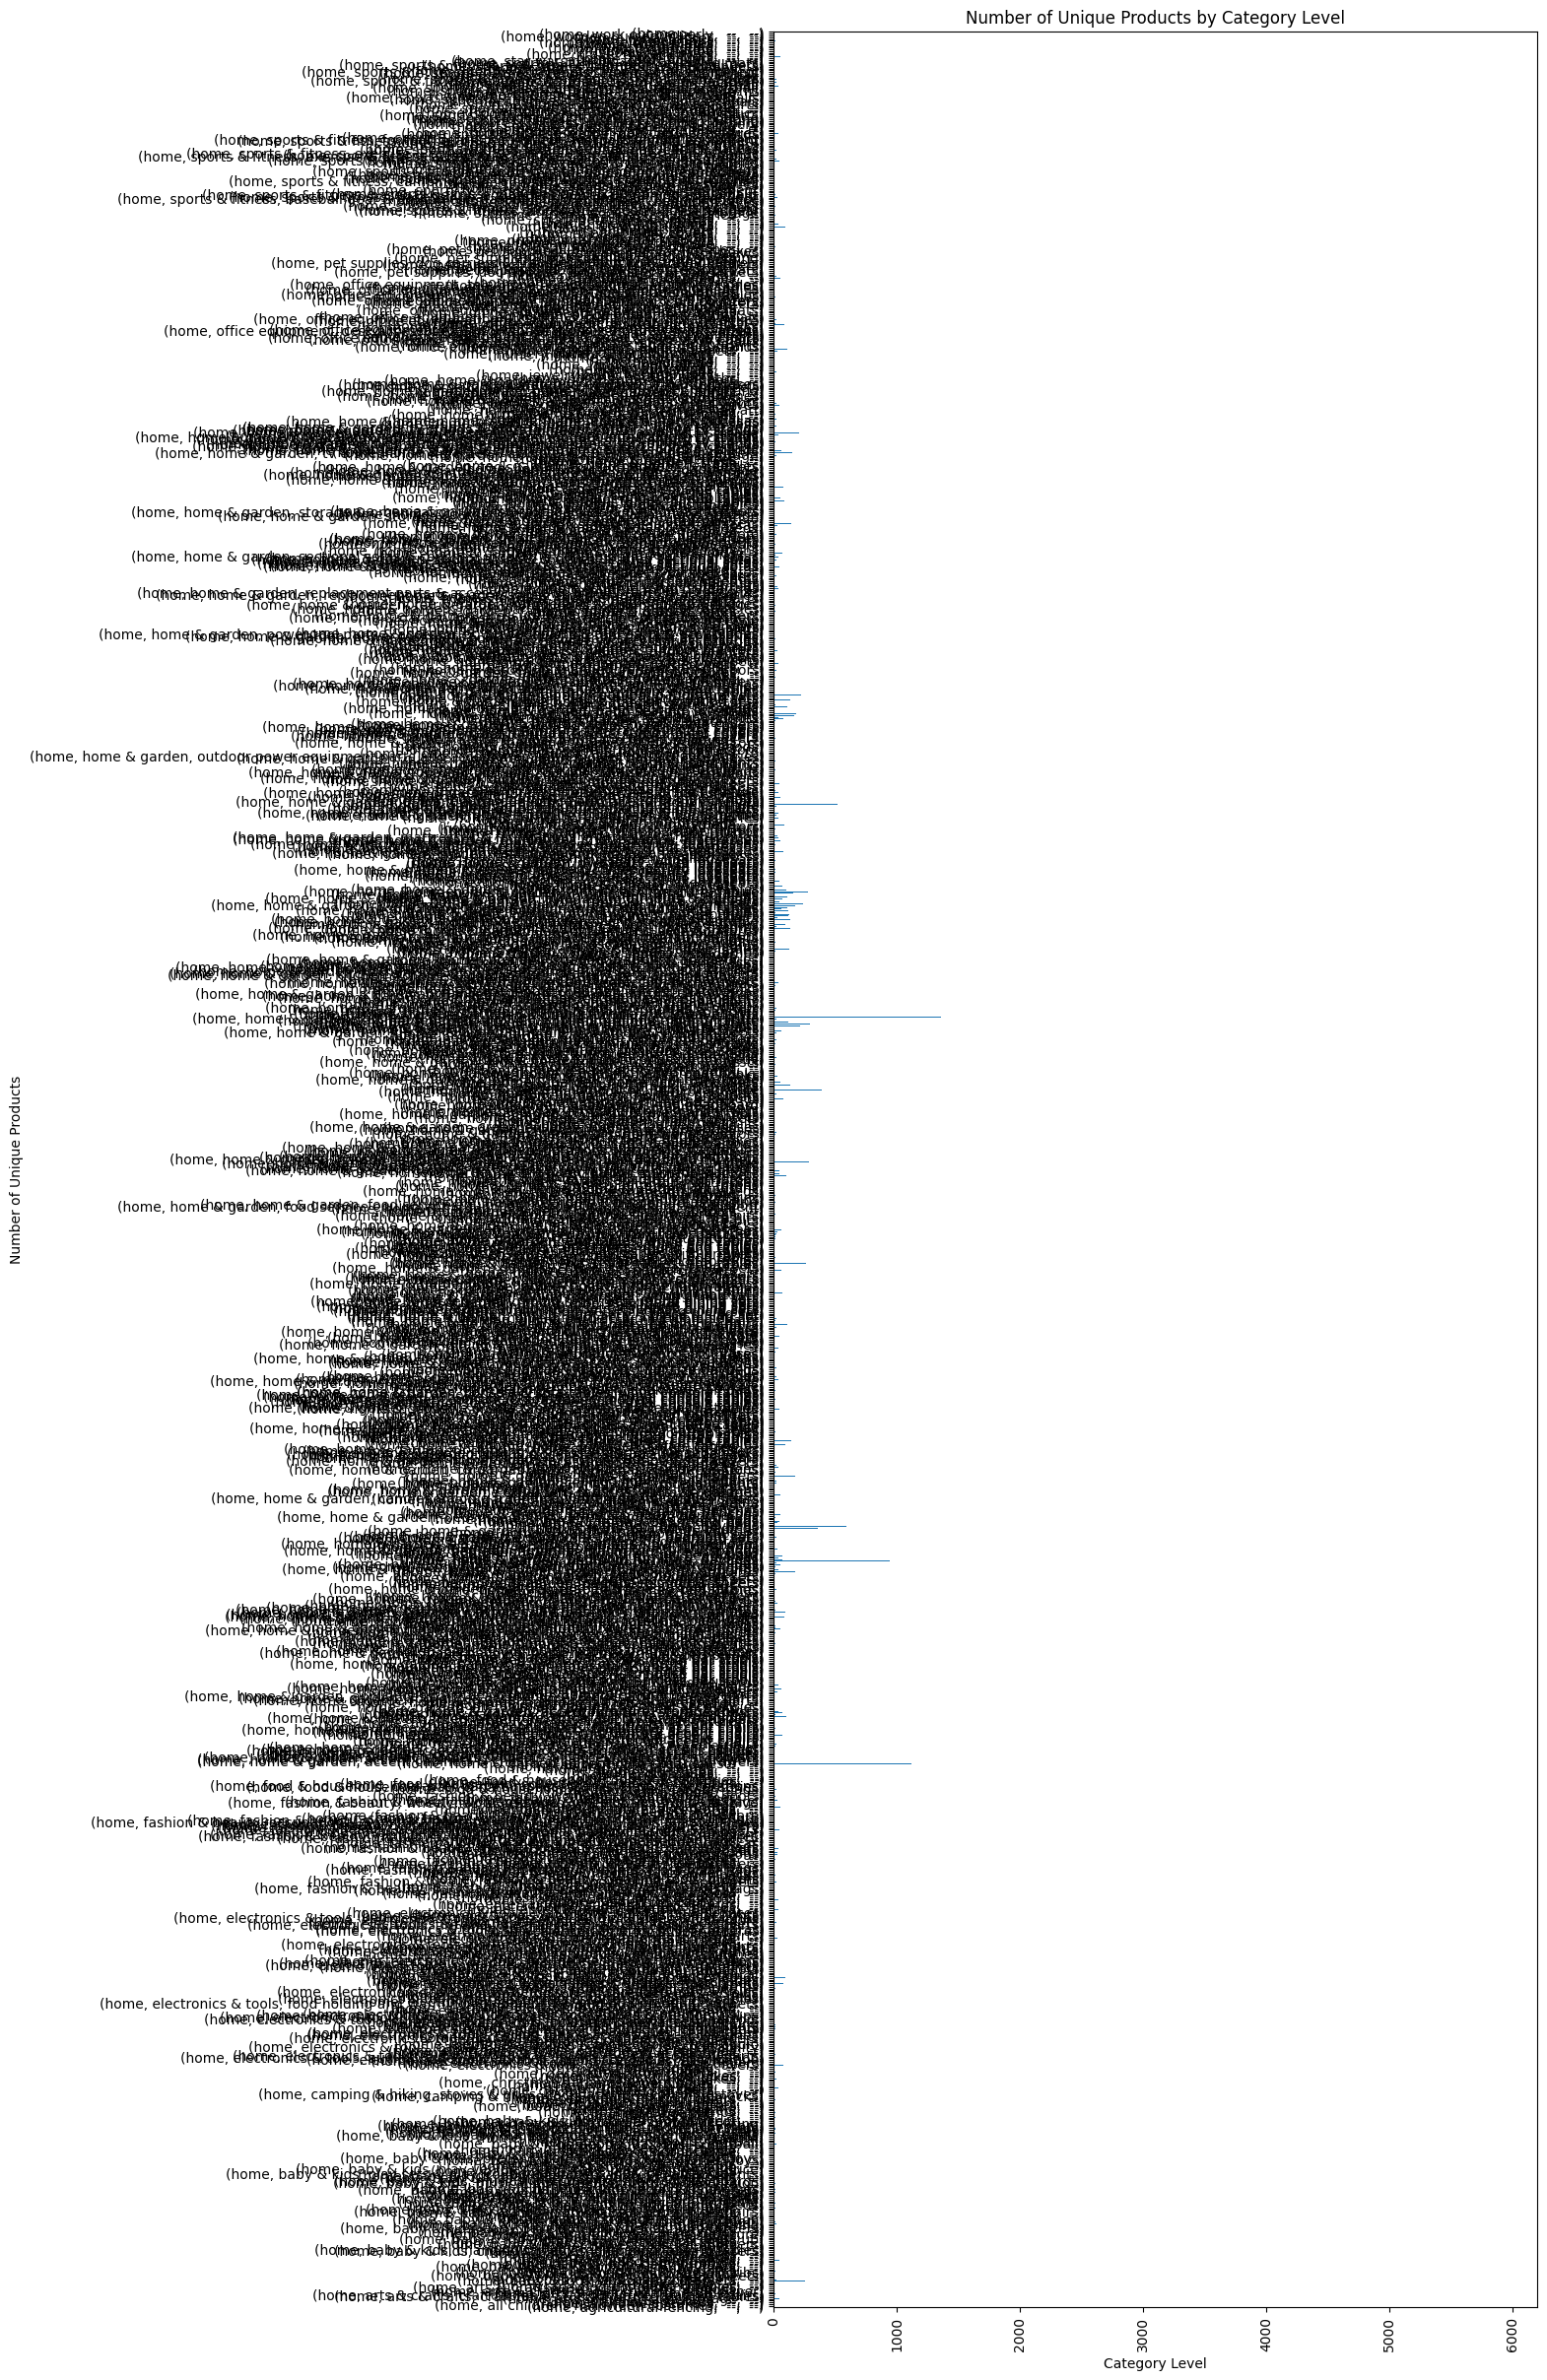

In [36]:
unique_products.plot(kind='barh', figsize=(10, 30))
plt.title('Number of Unique Products by Category Level')
plt.xlabel('Category Level')
plt.ylabel('Number of Unique Products')
plt.xticks(rotation=90)
plt.show()

In [17]:
cd = pd.read_csv('/content/drive/MyDrive/Ojcommerce/CampaignDetails.csv')



In [18]:
cd.head()

,Campaign,Campaign ID,Campaign type
0,Campaign test,956874233,Search
1,Google Build|Search|Category,960938847,Search
2,Google Build|Shopping,962409485,Shopping
3,Google Build|Search|DSA,962581865,Search
4,Shopping-Naomi Home-USA,993213720,Shopping


In [19]:
cd.isnull().sum()

Campaign         0
Campaign ID      0
Campaign type    0
dtype: int64

In [31]:
merged_df = pd.merge(apm, cd, on='Campaign ID')
merged_df = pd.merge(merged_df, prd, on='Item ID')

In [32]:
merged_df.head()

,Item ID,Campaign ID,Click type,Month,Currency code,Impr.,Clicks,All conv.,Conv. value,Cost,ROAS,Campaign,Campaign type,Product Title,Product type (1st level),Product type (2nd level),Product type (4th level),Product type (3rd level),Product type (5th level)
0,2049732,12873554814,"Shopping , Product , Online",21-Aug,USD,229,1,1,0.00,1.22,0.000000,Smart_m6_m7_GP1,Shopping,Crosley Kiawah Outdoor Wicker Ottoman Blue/Bro...,home,home & garden,patio seating,patio furniture & accessories,--
1,1147211,12873554814,"Shopping , Product , Coupon",21-Aug,USD,723,1,0,0.00,0.66,0.000000,Smart_m6_m7_GP1,Shopping,Proman Chair Valet - Proman - VL16123,home,office equipment,chairs & sofas,office furniture & lighting,managerial & executive chairs
2,1147211,12873554814,"Shopping , Product , Coupon",21-Aug,USD,723,1,0,0.00,0.66,0.000000,Smart_m6_m7_GP1,Shopping,Proman Chair Valet - Proman - VL16123,home,home & garden,closet organizers,storage & home organization,clothing racks
3,1147211,12873554814,"Shopping , Product , Coupon",21-Aug,USD,723,1,0,0.00,0.66,0.000000,Smart_m6_m7_GP1,Shopping,Proman Chair Valet - Proman - VL16123,home >,--,--,--,--
4,1147211,12873554814,"Shopping , Product , Online",21-Aug,USD,803,14,20,194.77,6.50,29.964615,Smart_m6_m7_GP1,Shopping,Proman Chair Valet - Proman - VL16123,home,office equipment,chairs & sofas,office furniture & lighting,managerial & executive chairs


# Summary statistics for cost and conversion value

In [35]:

print(merged_df[['Cost', 'Conv. value']].describe())

               Cost   Conv. value
count  62252.000000  62252.000000
mean       6.891596     31.820307
std       77.391026    325.103933
min        0.010000      0.000000
25%        0.430000      0.000000
50%        1.020000      0.000000
75%        2.690000      0.000000
max     7206.340000  29861.560000


# Total cost and conversion value by campaign

In [34]:
print(merged_df.groupby('Campaign')[['Cost', 'Conv. value']].sum())

                                       Cost  Conv. value
Campaign                                                
Naomi_Home_GP                      44710.55    164343.64
Naomi_Home_GP2                     39139.33    143520.04
Naomi_Home_GP3                     58687.86    201538.91
Naomi_Home_GP4                      9671.65     28694.43
SC_Bliss_High                        573.21         0.00
SC_Cindy_High                       1369.95      1734.72
SC_Cindy_Low                         313.94       474.28
SC_Helper_High                       123.39         0.00
SC_Isabella_High                    2101.92      6010.77
SC_LowLoftBed_NH                       1.00         0.00
SC_Platform_Beds_Low                 196.31      1770.00
SC_Play_Kitchen_High                1866.96       259.98
SC_Play_Kitchen_Low                  253.74         0.00
Smart_Max_Conv_GP_LT_NH             6713.89      9654.08
Smart_Max_Conv_LavPet                 20.43         0.00
Smart_NH_HP                    

# Pie chart of total cost by campaign

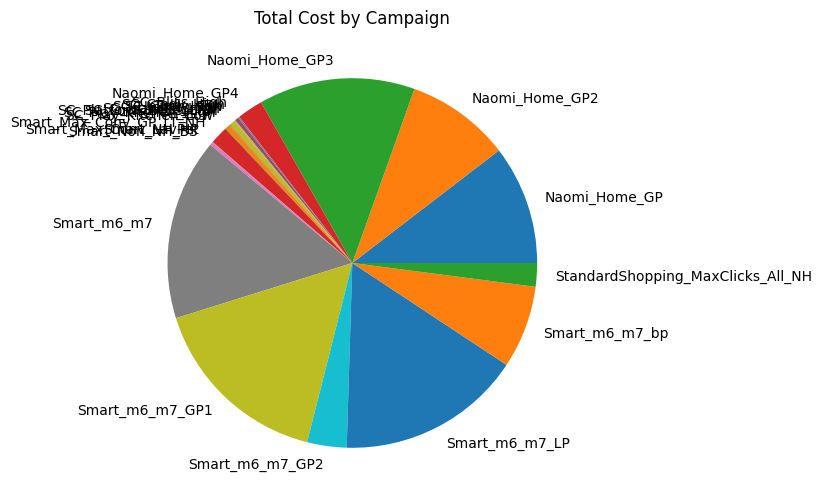

In [37]:
merged_df.groupby('Campaign')['Cost'].sum().plot(kind='pie', figsize=(10, 6))
plt.title('Total Cost by Campaign')
plt.ylabel('')
plt.show()

In [61]:
monthly_roas = merged_df.groupby('Month')['ROAS'].mean()
monthly_roas


Month
21-Aug    6.059251
21-Sep    8.417422
Name: ROAS, dtype: float64

In [62]:
campaign_roas = merged_df.groupby('Campaign')['ROAS'].mean()
campaign_roas

Product Title
!nspire 26'' COUNTER STOOL, FABRIC/BENTWOOD, GREY - !nspire - 203-981GY                                                         0.000000
!nspire 26'' COUNTER STOOL, SET OF 2, ABS/SOLID WOOD, WHITE - !nspire - 203-990WT                                               0.000000
!nspire 26'' COUNTER STOOL, SET OF 2, FABRIC/METAL, GREY - !nspire - 203-607GY                                                  0.000000
!nspire 26'' COUNTER STOOL, SET OF 2, FABRIC/SOLID WOOD, BEIGE - !nspire - 203-157BG                                            0.000000
!nspire 26'' COUNTER STOOL, SET OF 2, FABRIC/SOLID WOOD, BEIGE/COFFEE LEGS - !nspire - 203-221CF/BG                             0.000000
                                                                                                                                  ...   
idealBase Adjustable Bed Base with Massage, Head and Foot Incline, Wireless Remote by Naomi Home Color Gray, Size Split King    0.000000
idealBase Adjustable Bed Ba

In [63]:
category_roas = merged_df.groupby('Product type (3rd level)')['ROAS'].mean()
category_roas

Product type (3rd level)
 --                                8.947618
accessories                        0.000000
accessories & supplies             4.382646
action figures & statues           0.000000
all industrial                     0.000000
                                    ...    
whiteboards & dry erase boards    15.967624
window insulation kits             0.000000
winnie the pooh party supplies     0.000000
women                              6.036800
womens clothing                    0.000000
Name: ROAS, Length: 233, dtype: float64

In [64]:
product_roas = merged_df.groupby('Product Title')['ROAS'].mean()
product_roas

Product Title
!nspire 26'' COUNTER STOOL, FABRIC/BENTWOOD, GREY - !nspire - 203-981GY                                                         0.000000
!nspire 26'' COUNTER STOOL, SET OF 2, ABS/SOLID WOOD, WHITE - !nspire - 203-990WT                                               0.000000
!nspire 26'' COUNTER STOOL, SET OF 2, FABRIC/METAL, GREY - !nspire - 203-607GY                                                  0.000000
!nspire 26'' COUNTER STOOL, SET OF 2, FABRIC/SOLID WOOD, BEIGE - !nspire - 203-157BG                                            0.000000
!nspire 26'' COUNTER STOOL, SET OF 2, FABRIC/SOLID WOOD, BEIGE/COFFEE LEGS - !nspire - 203-221CF/BG                             0.000000
                                                                                                                                  ...   
idealBase Adjustable Bed Base with Massage, Head and Foot Incline, Wireless Remote by Naomi Home Color Gray, Size Split King    0.000000
idealBase Adjustable Bed Ba

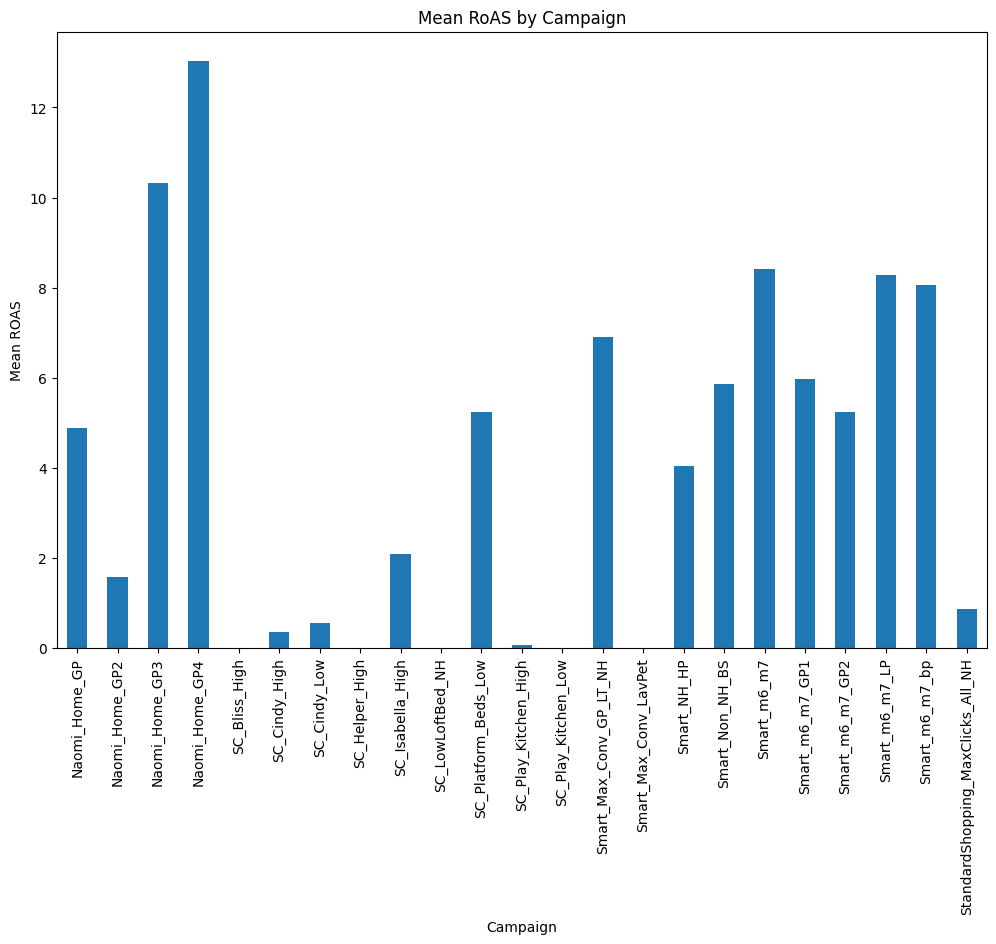

In [68]:
campaign_roas.plot(kind='bar', figsize=(12, 8))
plt.title('Mean RoAS by Campaign')
plt.xlabel('Campaign')
plt.ylabel('Mean ROAS')
plt.show()

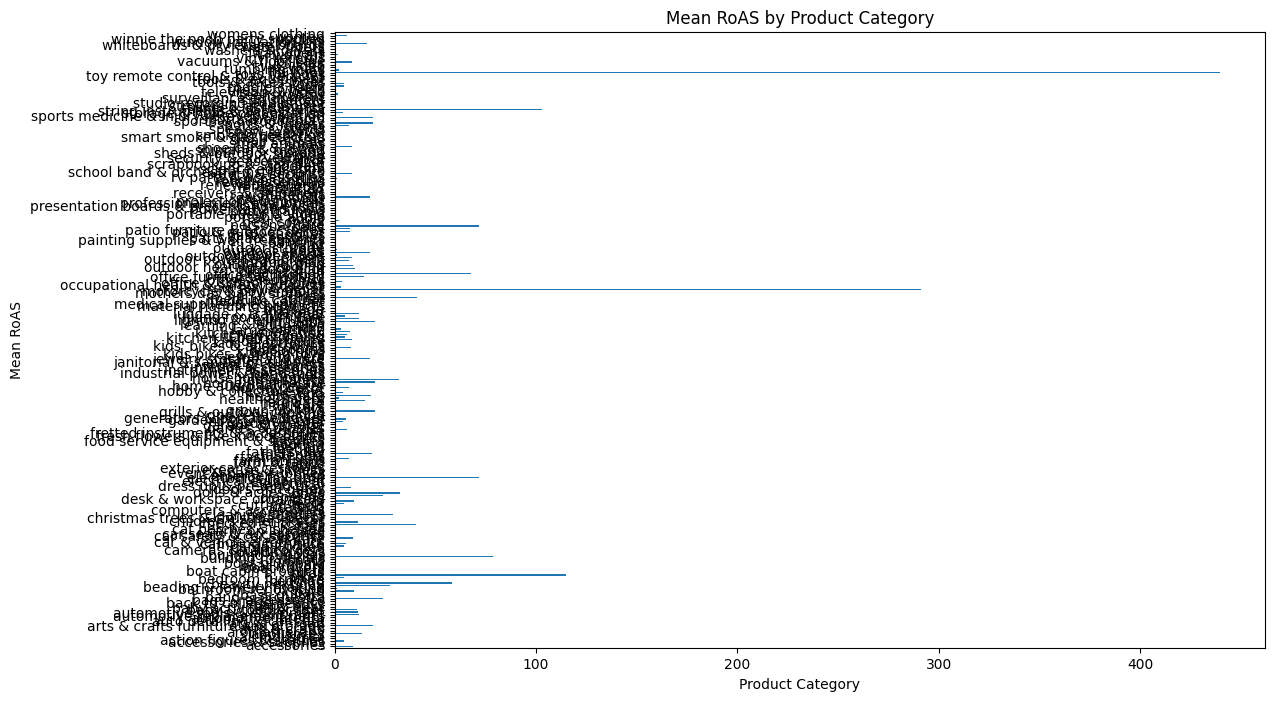

In [43]:
category_roas.plot(kind='barh', figsize=(12, 8))
plt.title('Mean RoAS by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Mean RoAS')
plt.show()

In [44]:
product_roas.plot(kind='barh', figsize=(12, 8))
plt.title('Mean RoAS by Product')
plt.xlabel('Product')
plt.ylabel('Mean RoAS')
plt.show()

KeyboardInterrupt: ignored

In [56]:
category_roas = merged_df.groupby('Product type (5th level)')['ROAS'].mean()
category_roas

Product type (5th level)
 --                          7.870070
3 piece dining set           0.000000
5 piece dining set           0.338919
7 piece dining set           1.901805
accent cabinets & chests     7.991603
                              ...    
wood loveseats               0.000000
wood tv stands              26.622806
woodworking tools            0.000000
work lights                  0.000000
yard signs & plaques         0.000000
Name: ROAS, Length: 740, dtype: float64

In [55]:
sorted_category_roas = category_roas.sort_values(ascending=False)
sorted_category_roas

Product type (5th level)
barware                  527.466667
door hinges              388.636364
fitpaws                  365.735294
body & frame parts       349.250000
messenger bags           194.216667
                            ...    
glass coffee tables        0.000000
glass console tables       0.000000
glass dining sets          0.000000
glassware & drinkware      0.000000
yard signs & plaques       0.000000
Name: ROAS, Length: 740, dtype: float64

In [54]:
top_10_categories = sorted_category_roas.head(10)
top_10_categories

Product type (5th level)
barware                         527.466667
door hinges                     388.636364
fitpaws                         365.735294
body & frame parts              349.250000
messenger bags                  194.216667
business office furniture       178.006716
home fragrance                  172.500000
nightstands                     165.854762
soup & stockpots                148.500000
drawers & cabinet organizers    103.456395
Name: ROAS, dtype: float64

In [57]:
bottom_10_categories = sorted_category_roas.tail(10)
bottom_10_categories

Product type (5th level)
game tables              0.0
garden hoses             0.0
glider covers            0.0
garden stakes            0.0
gas pressure washers     0.0
glass coffee tables      0.0
glass console tables     0.0
glass dining sets        0.0
glassware & drinkware    0.0
yard signs & plaques     0.0
Name: ROAS, dtype: float64

In [59]:
clicktype_roas = merged_df.groupby('Click type')['ROAS'].mean()
print(clicktype_roas)

Click type
Shopping , Product , Coupon    66.295520
Shopping , Product , Online     6.047954
Name: ROAS, dtype: float64


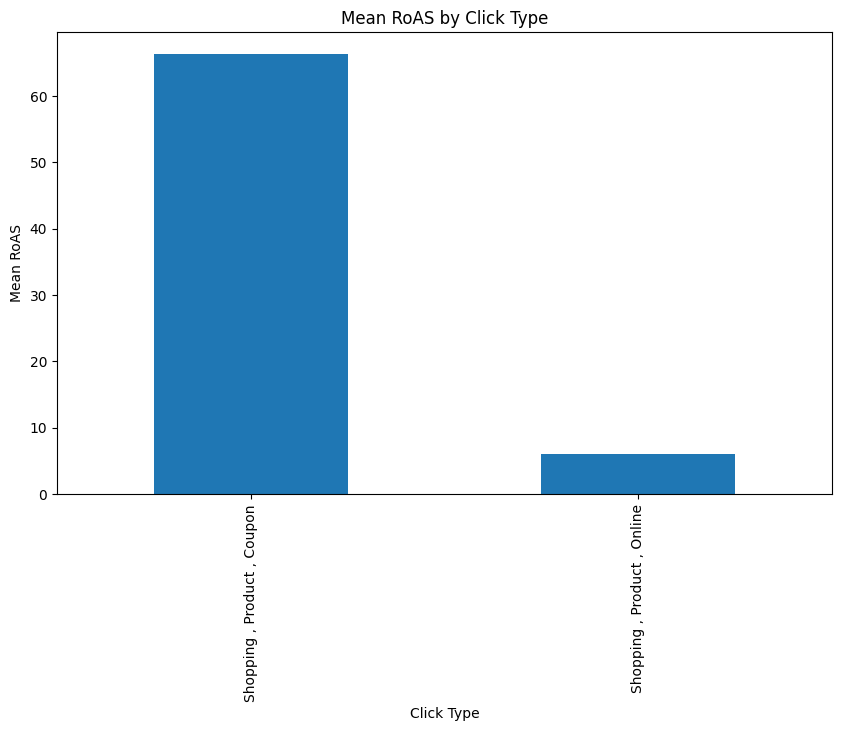

In [60]:
clicktype_roas.plot(kind='bar', figsize=(10, 6))
plt.title('Mean RoAS by Click Type')
plt.xlabel('Click Type')
plt.ylabel('Mean RoAS')
plt.show()

# we see a significant difference in RoAS between click types, we can conclude that click type is a significant factor that drives RoAS performance.

Click Type can be a significant factor that drives RoAS performance, as different click types may have different conversion rates and costs associated with them. For example, a "shopping ad" click may have a higher conversion rate compared to a "display ad" click, leading to a higher RoAS for the former. Additionally, different click types may have different costs associated with them, which can also impact the RoAS.

The other metrics that can be useful in evaluating campaign performance, such as:

Click-through rate (CTR): This measures the percentage of clicks a campaign receives out of the total number of impressions. A high CTR indicates that the ad is relevant and engaging to the target audience.

Cost per click (CPC): This measures the average cost per click for a campaign. A low CPC indicates that the campaign is efficient in generating clicks.

Conversion rate: This measures the percentage of users who completed a desired action, such as making a purchase or filling out a form, after clicking on an ad. A high conversion rate indicates that the campaign is effectively driving user engagement and achieving its objectives.

To incorporate these metrics into the analysis, one can calculate the mean values for each metric across the campaigns, product categories, or products of interest. For example, one can group the data by campaign and calculate the mean CTR, CPC, and conversion rate for each campaign.

Based on the analysis of these metrics, one can gain insights into the performance of the campaigns and identify areas for improvement. For instance, if the CPC is high for a particular campaign or product category, one can look for ways to optimize the targeting or ad copy to reduce the cost per click. Similarly, if the conversion rate is low, one can explore ways to improve the landing page experience.